In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from imblearn import under_sampling

In [27]:
#loading intermediate dataset ukbms and haduk, created in  HADUK_intermediate.py and UKBMS_HADUK_Exploration.ipynb
df = pd.read_csv('BioD_year_site_latlong.csv')
df.drop(columns=df.columns[0], inplace = True)

Text(0.5, 1.0, 'Boxplot of climatic variables')

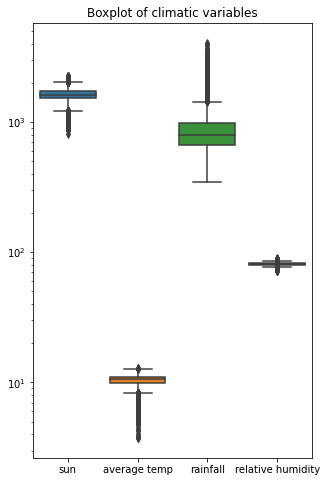

In [28]:
df1_climate = df.drop(columns=['Simpsons Index','SPECIES RICHNESS','TOTAL SITE INDEX','Site Number', 'YEAR', 'Easting','Northing','latitude','longitude'])
df1_climate.describe()

fig,ax = plt.subplots(figsize=(5,8))
bxplot = sns.boxplot(data=df1_climate)
bxplot.set_yscale('log')
plt.title('Boxplot of climatic variables')

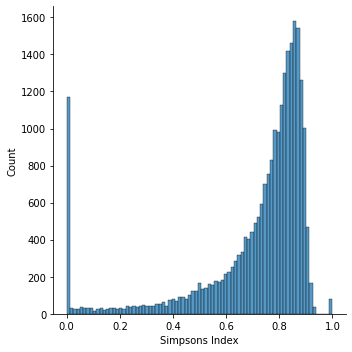

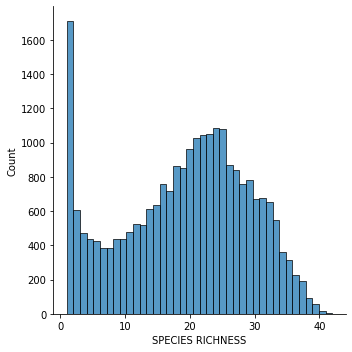

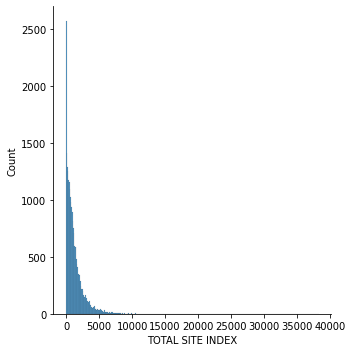

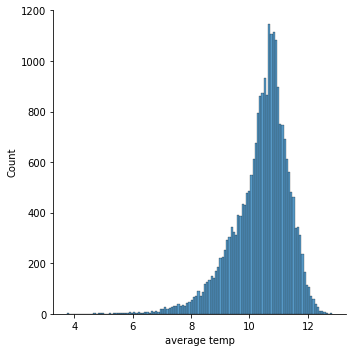

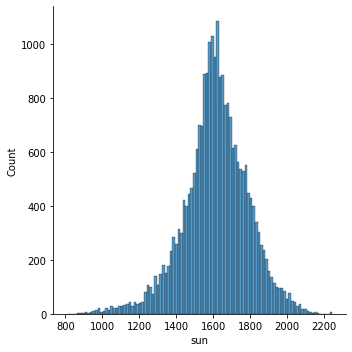

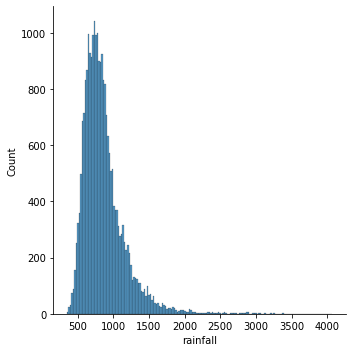

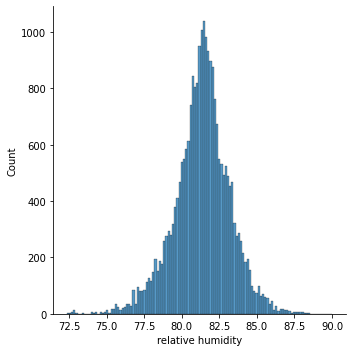

In [29]:
sns.displot(df['Simpsons Index'])
sns.displot(df['SPECIES RICHNESS'])
sns.displot(df['TOTAL SITE INDEX'])
sns.displot(df['average temp'])
sns.displot(df['sun'])
sns.displot(df['rainfall'])
sns.displot(df['relative humidity'])

Multiple Linear Regression, carried out on climatic variables (x) and species richness  (y):


In [30]:
x = df[['sun','average temp','rainfall','relative humidity']]
y= df[['SPECIES RICHNESS']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=44) #split into training and testing sets

<AxesSubplot:>

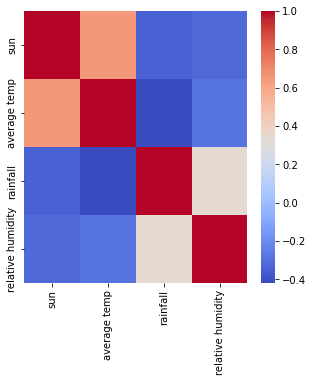

In [31]:
corr = x_train.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap='coolwarm')

In [32]:

x_train.drop(columns=['sun'],inplace=True)
x_test.drop(columns=['sun'],inplace=True)

In [33]:
#training multiple linear regression model 
model = LinearRegression()
model.fit(x_train, np.log(y_train))
print(model.coef_)
print(model.intercept_)

[[ 0.06703855 -0.00027393 -0.04370613]]
[5.80492544]


In [34]:
preds_SR = model.predict(x_test)

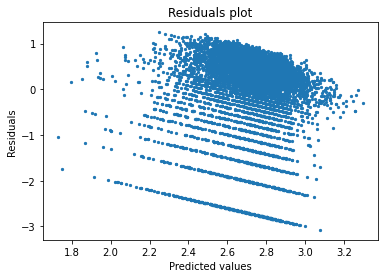

In [35]:
#plotting residuals
residuals = np.log(y_test)-preds_SR
plt.scatter(preds_SR,residuals,5)
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.title('Residuals plot')
plt.show()

In [36]:
mse = metrics.mean_squared_error(np.log(y_test),preds_SR)
r2 = metrics.r2_score(np.log(y_test),preds_SR)
print(mse)
print(np.sqrt(mse))
print(r2)

0.7450615386919197
0.8631694727525526
0.04805919630695088


In [37]:
#Checking diversity
x = df[['average temp','rainfall','relative humidity']]
y= df[['Simpsons Index']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=44)
model1 = LinearRegression()
model1.fit(x_train, y_train)
print(model1.coef_)
print(model1.intercept_)
preds_Div = model1.predict(x_test)
mse = metrics.mean_squared_error(y_test,preds_Div)
r2 = metrics.r2_score(y_test,preds_Div)
print('mse: ' + str(mse))
print('rmse: ' + str(np.sqrt(mse)))
print('r2: ' + str(r2))

[[ 9.50157468e-03 -7.94726070e-05 -8.92072927e-03]]
[1.40639564]
mse: 0.04964239506285567
rmse: 0.22280573390928626
r2: 0.03478576404689471


Decision tree classifier:

0.6803745928338762


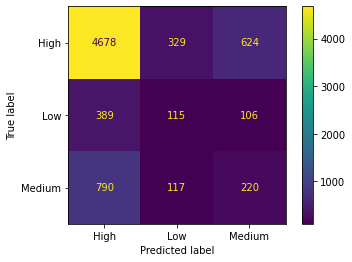

In [38]:
#multiclass classifcation decision tree classifier
x_c = df[['sun','average temp','rainfall','relative humidity']]
y_c = df[['Diversity']]
x_ctrain,x_ctest,y_ctrain,y_ctest = train_test_split(x_c,y_c,test_size=0.3,random_state=44)

dtree_model = tree.DecisionTreeClassifier()
dtree_model.fit(x_ctrain,y_ctrain)
dtree_preds = dtree_model.predict(x_ctest)

cm = metrics.confusion_matrix(y_ctest,dtree_preds)
acc = metrics.accuracy_score(y_ctest, dtree_preds)

metrics.ConfusionMatrixDisplay.from_predictions(y_ctest,dtree_preds)
print(acc)

In [39]:
#hyperparameter tuning 
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,3,5,7,9],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":[1,"log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50,70,90] }

In [40]:
#d tree classifier tunin
ctree_tuning = tree.DecisionTreeClassifier()
c_tuning_model=GridSearchCV(ctree_tuning,param_grid=parameters,scoring='accuracy',cv=3)
tuning_sample = df.sample(frac=0.3) #sampling dataset to prevent crashses when fitting tuning model
x_ctuning = tuning_sample[['sun','average temp','relative humidity','rainfall']]
y_ctuning = tuning_sample[['Diversity']]

In [41]:
c_tuning_model.fit(x_ctuning,y_ctuning) 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_features': [1, 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 30, 50, 70, 90],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
print(c_tuning_model.best_params_)
print(c_tuning_model.best_score_)

{'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.7659834678944121


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


0.7642508143322475


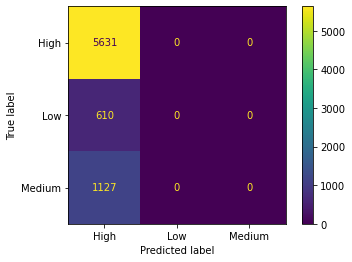

In [43]:
tuned_ctree = tree.DecisionTreeClassifier(max_depth=1,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
tuned_ctree.fit(x_ctrain,y_ctrain) 
tuned_ctree_preds = tuned_ctree.predict(x_ctest)

acc = metrics.accuracy_score(y_ctest, tuned_ctree_preds)

metrics.ConfusionMatrixDisplay.from_predictions(y_ctest,tuned_ctree_preds)
print(acc)

KNN CLASSIFICATION:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7607220412595005


0.6743548782062548

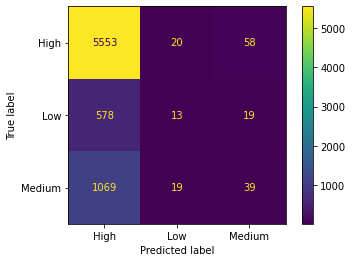

In [44]:
#multiclass classifcation k-nearest neighbours
knn_model = KNeighborsClassifier(n_neighbors = 10).fit(x_ctrain,y_ctrain)
#accuracy = knn_model.score(x_ctest,y_ctest)

knn_preds = knn_model.predict(x_ctest)
cm_knn = metrics.confusion_matrix(y_ctest,knn_preds)
acc_knn =metrics.accuracy_score(y_ctest,knn_preds)

metrics.ConfusionMatrixDisplay.from_predictions(y_ctest,knn_preds)
print(acc_knn)
metrics.f1_score(y_ctest,knn_preds, average='weighted')

KNN SCALED X VARIABLES:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.748371335504886


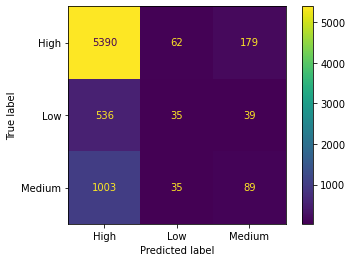

In [45]:
#scaled knn
scaler = StandardScaler()
df_scale = df.copy()
features = [['sun','average temp','rainfall','relative humidity']]
for feature in features:
    df_scale[feature] = scaler.fit_transform(df_scale[feature])

x_scaled  = df_scale[['sun','average temp','rainfall','relative humidity']]
y_s = df_scale[['Diversity']]

x_strain,x_stest,y_strain,y_stest = train_test_split(x_scaled,y_s,test_size=0.3,random_state=44)
knn_scaled_model = KNeighborsClassifier()
knn_scaled_model.fit(x_strain,y_strain)

knn_scaled_preds = knn_scaled_model.predict(x_stest)
acc_scaled = metrics.accuracy_score(y_stest,knn_scaled_preds)

metrics.ConfusionMatrixDisplay.from_predictions(y_stest,knn_scaled_preds)
print(acc_scaled)


In [46]:
metrics.f1_score(y_stest,knn_scaled_preds, average='weighted')

0.682738313321154

In [47]:
#knn  hyperparameter tuning
n_neighbors = [5,10,15,20,25,30]
leaf_size= list(range(1,25)) 
p=[1,2]

knn_hyperparameters = dict(n_neighbors=n_neighbors,leaf_size=leaf_size,p=p)
knn_tuned = KNeighborsClassifier()
knn_tuned_model = GridSearchCV(knn_tuned,knn_hyperparameters, cv=3)

In [48]:
knn_tuned_model.fit(x_strain,y_strain.values.ravel())
print('best leaf size:', knn_tuned_model.best_estimator_.get_params()['leaf_size'])
print('best p:', knn_tuned_model.best_estimator_.get_params()['p'])
print('best n_neighbors:', knn_tuned_model.best_estimator_.get_params()['n_neighbors'])


best leaf size: 2
best p: 1
best n_neighbors: 30


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7658794788273615
0.6733164631286662


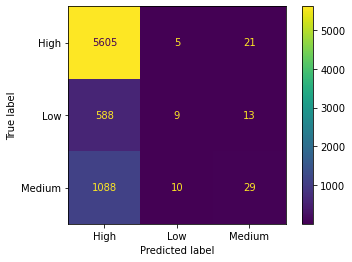

In [49]:
tuned_knn_model = KNeighborsClassifier(leaf_size=2,p=1,n_neighbors=30)
tuned_knn_model.fit(x_strain,y_strain)
tuned_knn_preds = tuned_knn_model.predict(x_stest)

acc_tuned_knn = metrics.accuracy_score(y_stest,tuned_knn_preds)

metrics.ConfusionMatrixDisplay.from_predictions(y_stest,tuned_knn_preds)
print(acc_tuned_knn)
print(metrics.f1_score(y_stest,tuned_knn_preds, average='weighted'))

Condensed Neareset Neighbor Undersamling:

In [50]:
undersample = under_sampling.CondensedNearestNeighbour()
x_under,y_under = undersample.fit_resample(x_strain,y_strain)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.757328990228013


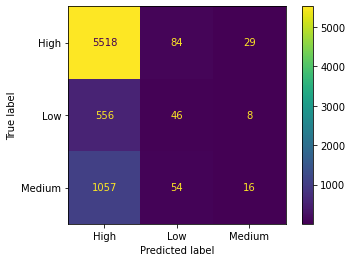

In [51]:
cnn_knn = KNeighborsClassifier(leaf_size=2,p=1,n_neighbors=30)
cnn_knn.fit(x_under,y_under)
cnn_knn_preds = cnn_knn.predict(x_stest)


acc_knn_cnn = metrics.accuracy_score(y_stest,cnn_knn_preds)
metrics.ConfusionMatrixDisplay.from_predictions(y_stest,cnn_knn_preds)
print(acc_knn_cnn)

In [52]:
rus_undersample = under_sampling.RandomUnderSampler(random_state=44,replacement=True)
x_rus,y_rus = undersample.fit_resample(x_strain,y_strain)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.756786102062975


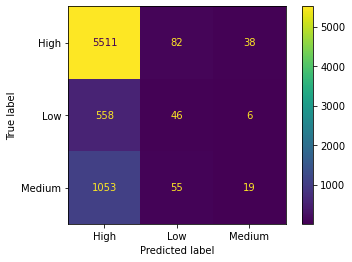

In [53]:
rus_knn = KNeighborsClassifier(leaf_size=2,p=1,n_neighbors=30)
rus_knn.fit(x_rus,y_rus)
rus_knn_preds = rus_knn.predict(x_stest)


acc_knn_rus = metrics.accuracy_score(y_stest,rus_knn_preds)
metrics.ConfusionMatrixDisplay.from_predictions(y_stest,rus_knn_preds)
print(acc_knn_rus)